<a href="https://colab.research.google.com/github/aramismainhard/STROKES/blob/main/ProyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Brain Stroke Prediction

##Contexto:
El ACV es una enfermedad aguda que se produce cuando se tapa o rompe una arteria del cerebro. Puede ser mortal o dejar a la persona afectada con una discapacidad.
Los vasos sanguíneos se bloquean o se estrechan debido a algunos factores:
-Colesterol alto(Tener sobrepeso e inactividad fisica)
-Diabetes
-Hipertension arterial
-Insuficiencia cardiaca
-Fumar, Beber en exceso o consumir drogas
-Historial de accidentes cerebrovasculares previos o traumatismos
-Algunas investigaciones iniciales muestran que la infección por COVID-19 puede aumentar el riesgo de sufrir un accidente cerebrovascular isquémico, pero se requieren más estudios.


Según la Organización Mundial de la Salud (OMS), el accidente cerebrovascular es la segunda causa de muerte en todo el mundo. 
Cerca del 90% de los casos de ACV son prevenibles, ya que los principales factores de riesgo pueden ser controlados y tratados
Este conjunto de datos se utiliza para predecir si es probable que un paciente sufra un accidente cerebrovascular en función de los parámetros de entrada como el sexo, la edad, diversas enfermedades y el tabaquismo. Cada fila de los datos proporciona información relevante sobre el paciente.


Se utilizara un Dataset de Kaggle :
Información de atributo
1) id: identificador único
2) gender:"Masculino", "Femenino" u "Otro"
3) age: edad del paciente
4) hypertension: 0 si el paciente no tiene hipertensión, 1 si el paciente tiene hipertensión
5) heart_disease: 0 si el paciente no tiene ninguna enfermedad del corazón, 1 si el paciente tiene una enfermedad del corazón
6) ever_married: "No" o "Sí"
7) work_type: "niños", "Govt_jov", "Never_worked", "Private" o "Self-employment"
8) Residence_type: "Rural" o "Urban"
9) avg_glucose_level: nivel promedio de glucosa en sangre
10) IMC: índice de masa corporal
11) smoking_status: "anteriormente fumó", "nunca fumó", "fuma" o "Desconocido"*
12) ictus: 1 si el paciente tuvo un ictus o 0 en caso contrario
*Nota: "Desconocido" en smoking_status significa que la información no está disponible para este paciente

##OBJETIVO

Elaborar un modelo de machine learning para facilitar el trabajo de diagnostico 
de profesionales de la salud


In [ ]:
#para montar en drive
from google.colab import drive
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import distplot
import plotly
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
import plotly.express as px

In [ ]:
url = "/content/drive/MyDrive/Data Science Coderhouse /ProyectoFinal/acv.csv"
try:
   df=pd.read_csv('/content/drive/MyDrive/Data Science Coderhouse /ProyectoDs_parteII_Mainhard_Rodriguez/acv.csv',encoding='latin1')
except:
  df=pd.read_csv(url, encoding='latin1')

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.00,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.00,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,60182,Female,49.00,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,1665,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1


### Data Cleaning

In [ ]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
df.describe(include = "all")

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.00,5110,5110.00,5110.00,5110.00,5110,5110,5110,5110.00,4909.00,5110,5110.00
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.83,NaN,43.23,0.10,0.05,NaN,NaN,NaN,106.15,28.89,NaN,0.05
std,21161.72,NaN,22.61,0.30,0.23,NaN,NaN,NaN,45.28,7.85,NaN,0.22
min,67.00,NaN,0.08,0.00,0.00,NaN,NaN,NaN,55.12,10.30,NaN,0.00
25%,17741.25,NaN,25.00,0.00,0.00,NaN,NaN,NaN,77.25,23.50,NaN,0.00
50%,36932.00,NaN,45.00,0.00,0.00,NaN,NaN,NaN,91.88,28.10,NaN,0.00
75%,54682.00,NaN,61.00,0.00,0.00,NaN,NaN,NaN,114.09,33.10,NaN,0.00


In [ ]:
print(df['gender'].unique())
print(df['work_type'].unique())
print(df['Residence_type'].unique())
print(df['smoking_status'].unique())
print(df['ever_married'].unique())

['Male' 'Female' 'Other']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
['Yes' 'No']


### Sacamos el id que no aporta datos y colocamos la edad en numeros enteros

In [ ]:
df = df.drop(['id'], axis=1)
df['age'] = df['age'].astype('int')

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   int64  
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 439.3+ KB


###Vemos si hay datos nulos

In [ ]:
df.isnull().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

###Los reemplazamos con la media y quitamos Otros de genero por que no aporta datos

In [ ]:
df["bmi"].fillna(df["bmi"].mean(), inplace=True)

In [ ]:
df = df[df['gender'] != 'Other']


In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.89,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1


# Comenzamos con EDA

In [ ]:
stroke=df.stroke.sum()
stroke

249

In [ ]:
strokes=df[df.stroke == 1]
strokes

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.89,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
244,Male,57,0,0,Yes,Private,Rural,84.96,36.70,Unknown,1
245,Female,14,0,0,No,children,Rural,57.93,30.90,Unknown,1
246,Female,75,0,0,Yes,Self-employed,Rural,78.80,29.30,formerly smoked,1
247,Male,71,1,0,Yes,Self-employed,Rural,87.80,28.89,Unknown,1


### Visualizamos cantidad de casos positivos

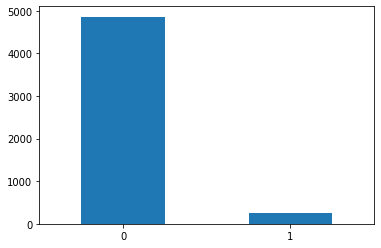

In [ ]:
count_s= pd.value_counts(df['stroke'], sort = True)
count_s.plot(kind = 'bar', rot=0)

### Como vemos el dataset se encuentra desbalanceado

#### Visualizamos la cantidad de acv por genero

In [ ]:
gender = df.groupby(df['gender'])['stroke'].sum()
gender

gender
Female    141
Male      108
Name: stroke, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

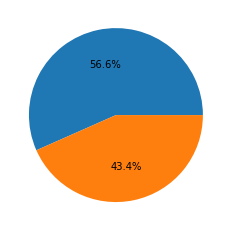

In [ ]:
plt.pie(gender,autopct='%1.1f%%')
plt.show

###Insigth: hay un porcentaje mas probable que los  pacientes tengan acv si son mujeres

#Visualizamos por edad

In [ ]:
age = df.groupby(df['age'])['stroke'].sum()
age

age
0      0
1      1
2      0
3      0
4      0
      ..
78    21
79    17
80    17
81    14
82     9
Name: stroke, Length: 83, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

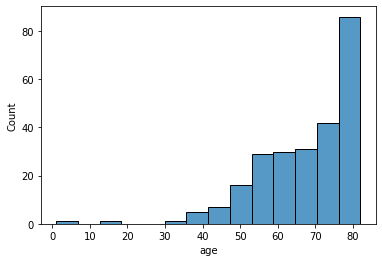

In [ ]:
sns.histplot(data=strokes, x="age", multiple="stack")
plt.show

###Insigth: La edad aumenta el riesgo de ACV

#Visualizamos por nivel de glucosa

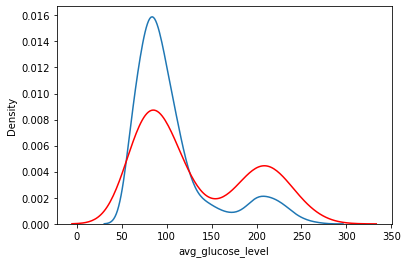

In [ ]:
distplot(df.avg_glucose_level, hist=False)
distplot(strokes.avg_glucose_level, hist=False, color= "Red")

###Insigth: Cuando la glucosa llega a los 200 , la probabilidad de acv es mas alta

#Visualizamos por bmi

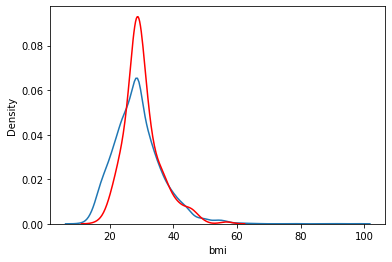

In [ ]:
distplot(df.bmi, hist=False)
distplot(strokes.bmi, hist=False, color= "Red")

###Insigth: Los valores mas repetidos de la poblacion tambien son los que mas causan ACV.

#Visualizamos ACV por smoking

In [ ]:
smoke = df.groupby(df['smoking_status'])['stroke'].sum()
smoke


smoking_status
Unknown            47
formerly smoked    70
never smoked       90
smokes             42
Name: stroke, dtype: int64

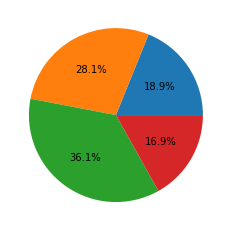

In [ ]:
plt.pie(smoke,autopct='%1.1f%%') 
plt.title=('Smoking status of people who had stroke')

###Insigth: Nada relevante

#Visualizamos ACV con enfermedades cardiacas


In [ ]:
heart_d = df.groupby(df['heart_disease'])['stroke'].sum()
heart_d

heart_disease
0    202
1     47
Name: stroke, dtype: int64

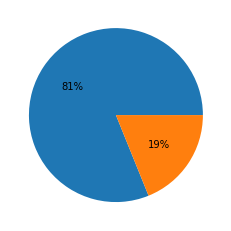

In [ ]:
fig, ax = plt.subplots()
ax.pie(heart_d, autopct='%.0f%%')
plt.show()

###Insigth= Solo el 19,14% de los pacientes tienen enfermedades del corazón

#Visualizamos ACV con hipertension 


In [ ]:
hiper = df.groupby(df['hypertension'])['stroke'].sum()
hiper

hypertension
0    183
1     66
Name: stroke, dtype: int64

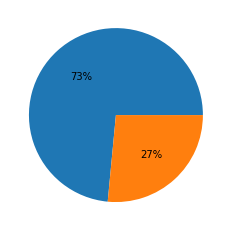

In [ ]:
fig, ax = plt.subplots()
ax.pie(hiper, autopct='%.0f%%')
plt.show()

###Insigth: Solo el 28,71% de los pacientes tienen hipertensión


#Visualizamos ACV por estado civil 


In [ ]:
married = df.groupby(df['ever_married'])['stroke'].sum()
married

ever_married
No      29
Yes    220
Name: stroke, dtype: int64

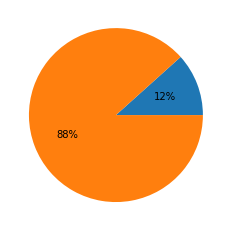

In [ ]:
fig, ax = plt.subplots()
ax.pie(married, autopct='%.0f%%')
plt.show()

###Insigth: Aumenta las probabilidades de contraer un ACV si esta casado, probablemente una demostracion que la muestra sea pequeña

#Visualizamos ACV por estado laboral 


In [ ]:
work = df.groupby(df['work_type'])['stroke'].sum()
work

work_type
Govt_job          33
Never_worked       0
Private          149
Self-employed     65
children           2
Name: stroke, dtype: int64

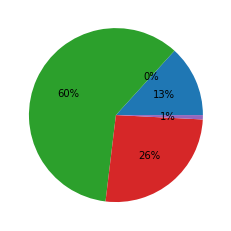

In [ ]:
fig, ax = plt.subplots()
ax.pie(work, autopct='%.0f%%')
plt.show()

###Insigth: el porcentaje mas alto Trabaja de forma dependiente 

###Visualizamos ACV por lugar de residencia


In [ ]:
residence = df.groupby(df['Residence_type'])['stroke'].sum()
residence

Residence_type
Rural    114
Urban    135
Name: stroke, dtype: int64

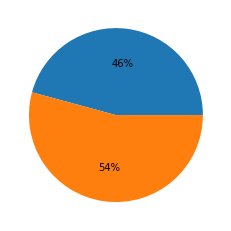

In [ ]:
fig, ax = plt.subplots()
plt.pie(residence, autopct='%.0f%%')
plt.show()

###Insigth: Vivir en la ciudad aumenta el riesgo a contraer un acv

#Insights

###Matriz de Correlacion

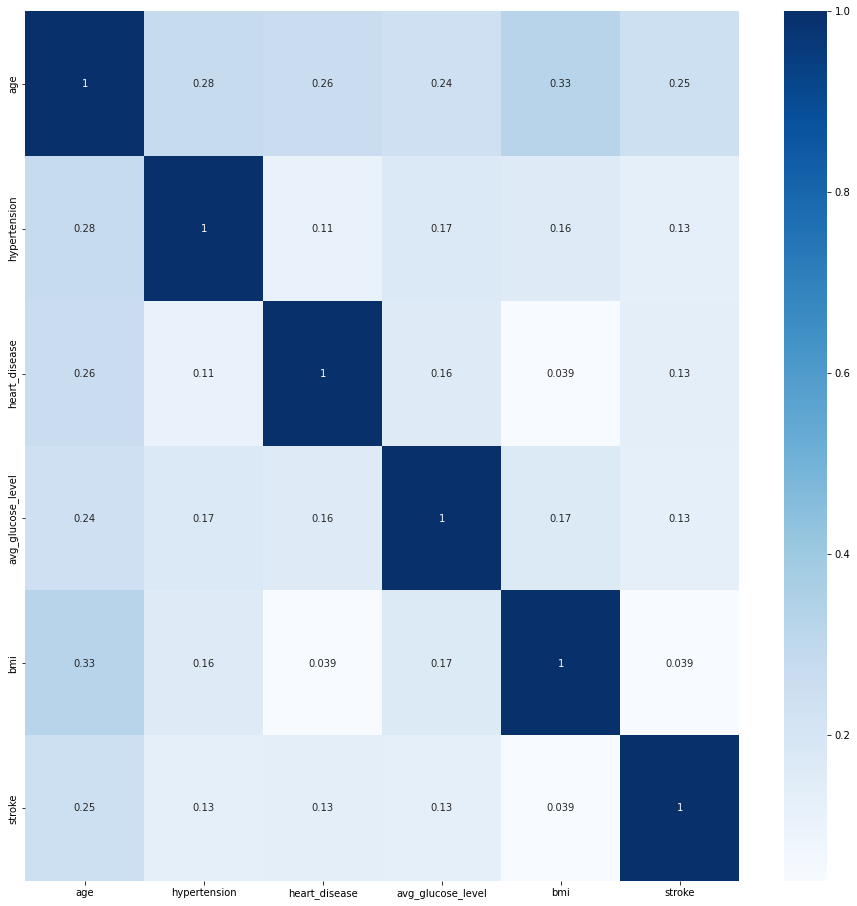

In [ ]:
corrmat = df.corr() 
top_corr_features = corrmat.index
plt.figure(figsize=(16,16))
matriz_corr=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="Blues")
plt.show()

###La matriz de correlacion muestra que la probabilidad de contraer un acv son mas altas si tenemos en cuenta el bmi y la edad como factores complementarios.

In [ ]:
fig = px.histogram(strokes, x=strokes.age, y=strokes.bmi,hover_data=df.columns)
fig.show()

###Insigth: Como observamos hay una pequeña correlacion con dos picos a los 59 y 79

In [ ]:
fig = px.histogram(strokes, x=strokes.age, y=strokes.hypertension,hover_data=df.columns)
fig.show()

### Hay Correlacion a partir de los 60

In [ ]:
fig = px.histogram(strokes, x=strokes.age, y=strokes.heart_disease,hover_data=df.columns)
fig.show()

### Hay correlacion de la edad con las enfermedades cardiacas

# Algoritmo de Clasificacion 

In [ ]:
#primero tratamos las variables categoricas para poder aplicar el modelo
df=pd. get_dummies(df)
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228.69,36.60,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
1,61,0,0,202.21,28.89,1,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,80,0,1,105.92,32.50,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49,0,0,171.23,34.40,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79,1,0,174.12,24.00,1,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0


###Quito una columna de Smoking ya que la 4ta es combinacion lineal de las otras 3

In [ ]:
df = df.drop(['smoking_status_Unknown'], axis=1)
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228.69,36.60,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0
1,61,0,0,202.21,28.89,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0
2,80,0,1,105.92,32.50,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0
3,49,0,0,171.23,34.40,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1
4,79,1,0,174.12,24.00,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0


### Usamos lazypredict para saber que algoritmo me conviene utilizar

In [ ]:
pip install lazypredict


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

# definimos matriz de diseño X y vector respuesta y
X = df.drop(['stroke'], axis = 1)
y = df['stroke']


In [ ]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
models, predictions = LazyRegressor().fit(X_train, X_test, y_train, y_test)
print(models[:10])

 74%|███████▍  | 31/42 [01:56<00:41,  3.77s/it]


KeyboardInterrupt: ignored

### Como vemos el mejor modelo es GradientBoostingRegressor

#Aplicamos modelo

In [ ]:
# Separamos en entrenamiento/test en razon 70/30 %
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)
X_train.shape, X_test.shape

((3576, 19), (1533, 19))

In [ ]:
# Creamos un modelo con parametros por defect
clf = RandomForestClassifier(criterion='gini', random_state=0,max_depth=5, class_weight= 'balanced')
model=clf.fit(X_train, y_train)

In [ ]:
# Obtenemos las predicciones del modelo con X_test
preds = model.predict(X_test) 

<Figure size 720x432 with 0 Axes>

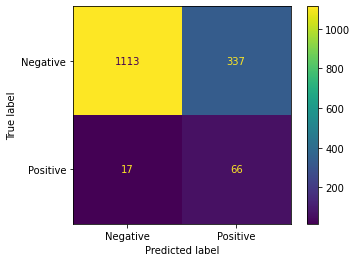

In [ ]:
#Realizamos matriz de confusion para ver el resultado de la prediccion
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(model, X_test, y_test, display_labels=['Negative', 'Positive'])

In [ ]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86      1450
           1       0.16      0.80      0.27        83

    accuracy                           0.77      1533
   macro avg       0.57      0.78      0.57      1533
weighted avg       0.94      0.77      0.83      1533



In [ ]:
66+17

83